Corinne 7-14

In [1]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding
from sklearn.metrics.pairwise import euclidean_distances
from scipy import stats
from sklearn.decomposition import PCA

### Load data and embeddings ###

#### CAFs ####

In [3]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
expr = pd.read_csv(path + 'data/CAFs.txt', sep='\t')
y_train = expr.values[:,expr.shape[1]-1]

In [11]:
emb_path = path + 'embeddings/CAFs/'

In [12]:
pcaM = np.load(emb_path+'CAFs_pca.npy')
umapM = np.load(emb_path+'CAFs_umap.npy')

#### Cell Mix ####

##### no loc avg #####

In [ ]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
df = pd.read_csv(path + 'data/pcadata_CellMix.csv')
X_train = df.values[:,0:(df.shape[1]-1)]
y_train = df.values[:,df.shape[1]-1]

##### Loc Avg #####

In [ ]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
df = pd.read_csv(path + 'data/pcadata_CellMix_WithLocAvg.csv')
X_train = df.values[:,0:(df.shape[1]-1)]
y_train = df.values[:,df.shape[1]-1]

#### Duo 4eq, 8eq ####
Downloaded from https://github.com/hyhuang00/scRNA-DR2020/tree/main/data on 7-21-25.<br>


In [ ]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
X_train = np.load("data/"+ "8eq_log_pca.npy") # just change 4 to 8, vice versa to load other set
y_train = np.load("data/"+ "8eq_labels.npy")

#### Kang #### 
Downloaded from https://github.com/hyhuang00/scRNA-DR2020/tree/main/data on 7-21-25.<br>


In [ ]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
X_train = np.load("data/"+ "kang_log_pca.npy")
y_train = np.load("data/"+ "kang_labels.npy")

NameError: name 'np' is not defined

#### MNIST ####

In [ ]:
from sklearn import datasets
mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
X_train = mnist.data
y_train = mnist.target.astype(int)

#### Muraro #### 
Downloaded from https://github.com/hyhuang00/scRNA-DR2020/tree/main/data on 7-21-25.


In [ ]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
X_train = np.load("data/"+ "muraro_log_pca.npy")
y_train = np.load("data/"+ "muraro_labels.npy")

#### TM Lung, Pancreas ####

##### no loc avg #####

In [ ]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
df = pd.read_csv(path + 'data/pcadata_TMPanc.csv')
X_train = df.values[:,0:(df.shape[1]-1)]
y_train = df.values[:,df.shape[1]-1]

##### loc avg #####

In [ ]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
df = pd.read_csv(path + 'data/pcadata_TMPanc_WithLocAvg.csv')
X_train = df.values[:,0:(df.shape[1]-1)]
y_train = df.values[:,df.shape[1]-1]

NameError: name 'pd' is not defined

### Scale and Concatenate ###

In [44]:
alpha = 0.67
umapM_sc = umapM * (alpha) # sc for scaled
pcaM_sc = pcaM * (1-alpha)

Concatenate PCA-m, UMAP-m

In [45]:
concat_emb = np.concatenate((pcaM_sc,umapM_sc), axis=1)
print(concat_emb.shape)

(716, 4)


### Final Embedding ###

In [46]:
reducer = PCA(n_components=2, random_state=42)
y = reducer.fit_transform(concat_emb)
y = y / LA.norm(y) # normalize scale to 1

In [48]:
np.save(emb_path + 'UMAP-PCA/CAFs_up_0.67.npy', y)

### Plot ###

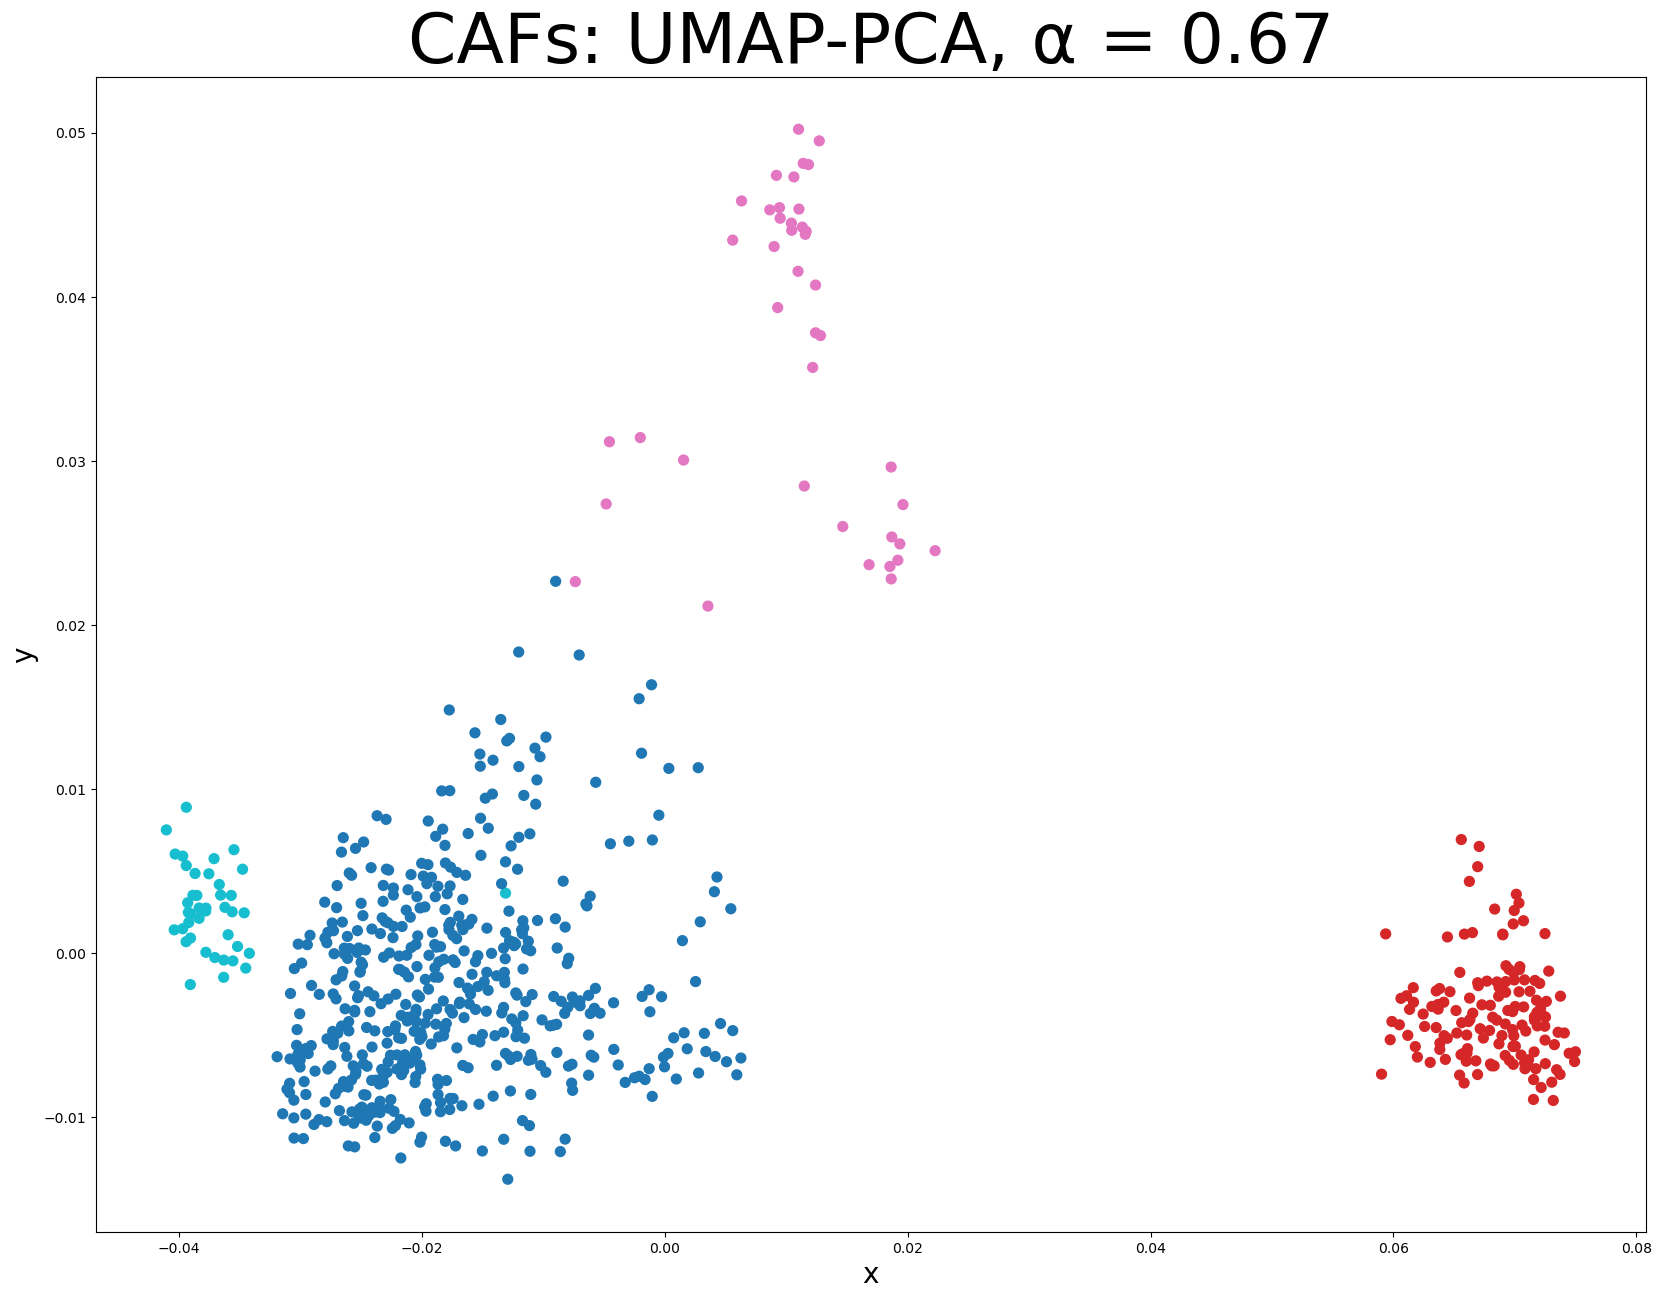

In [47]:
plt.figure(figsize=(20,15))

# for Kang
#colors = ['#1f77b4','#ff7f0e','#0d5e02','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#9ccf00','#07c1ef','#23199d','#099b95','#f6bf00'] # Kang
#mapped_colors = [colors[int(value-1)] for value in y_train]
#plt.scatter(y[:,0], y[:,1], s = 50, c=mapped_colors) # Kang

plt.scatter(y[:,0], y[:,1], s = 50, c=y_train, cmap='tab10')
# tSNE_PCA: \u03B1 = 0.75
plt.title("CAFs: UMAP-PCA, \u03B1 = 0.67", fontsize = 50)
plt.xlabel("x", fontsize = 20); plt.ylabel("y", fontsize = 20)
plt.show()